<a href="https://colab.research.google.com/github/SwetaSengupta/Chicago_taxi_project/blob/master/Taxiproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hypothesis Generation:

Chicago is centralized. 

Chicago residents use taxis more during rush hour

Taxi fare is higher during rush hour

Taxi fare is higher in downtown Chicago area than other parts of Chicago

If the distance traveled is more, then fare is higher.


#Additonal analysis done:
To better understand the relationship between distance travelled, time taken and cost, will analyse the correlation matrix of them

In [0]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
# links of raw data
#!wget https://github.com/tensorflow/tfx/blob/master/tfx/examples/chicago_taxi_pipeline/data/simple/data.csv

#raw data
#https://raw.githubusercontent.com/tensorflow/tfx/master/tfx/examples/chicago_taxi_pipeline/data/simple/data.csv

In [90]:
# reading the dataset
df= pd.read_csv('https://raw.githubusercontent.com/tensorflow/tfx/master/tfx/examples/chicago_taxi_pipeline/data/simple/data.csv')
print(df.shape)
df.head(2)

(15000, 18)


,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,payment_type,company,trip_seconds,dropoff_community_area,tips
0,60,27.05,10,2,3,1380593700,41.836150,-87.648788,NaN,NaN,12.6,NaN,NaN,Cash,Taxi Affiliation Services,1380.0,NaN,0.0
1,10,5.85,10,1,2,1382319000,41.985015,-87.804532,NaN,NaN,0.0,NaN,NaN,Cash,Taxi Affiliation Services,180.0,NaN,0.0


In [0]:
df.pickup_community_area.unique()

array([60, 10, 14, 13, 16, 30, 11, 33, 19, 25, 18,  8, 32,  2,  3,  7,  6,
       24,  4, 21, 28, 22, 41, 77, 66, 31, 39,  5, 12, 23, 29, 59, 17, 34,
       73, 27, 35, 42, 36, 45, 58, 69, 71, 43, 68, 76, 74,  1, 56, 20, 49,
       38, 44, 40,  9, 64, 15, 65, 26, 57, 63, 61])

In [91]:
#creating a dataframe for seaborn visualization
df_seaborn = df[['pickup_community_area','fare','trip_start_month','trip_start_hour','trip_start_day','trip_miles']]
df_seaborn.head()


,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_miles
0,60,27.05,10,2,3,12.6
1,10,5.85,10,1,2,0.0
2,14,16.65,5,7,5,0.0
3,13,16.45,11,12,3,6.9
4,16,32.05,12,1,1,15.4


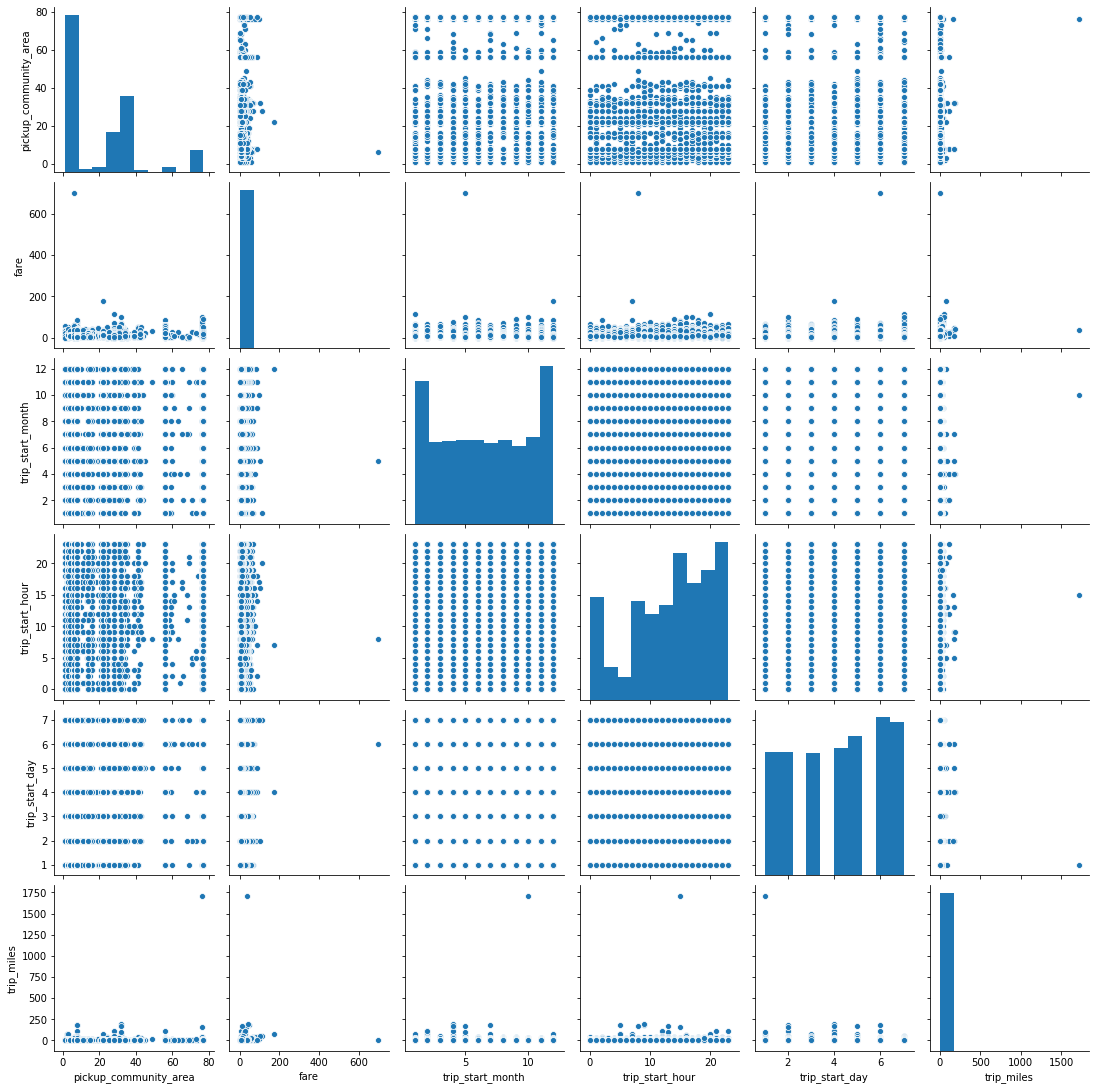

In [0]:
# Seaborn visualization 
# Created the pairplots only to understand the data
import seaborn as sns

sns.pairplot(df_seaborn)

In [157]:
#first visualization to inspect patterns in ridership
import plotly.express as px
fig = px.scatter_mapbox(df, lat='pickup_latitude', lon='pickup_longitude', color='pickup_community_area', opacity=1.0,width= 800, height=700)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

## Proving the hypothesis: Chicago is centralized

In [0]:
# finding number of rides per area using value_counts()

df['pickup_community_area'].value_counts().head(2)

8     4907
32    3303
Name: pickup_community_area, dtype: int64

In [0]:
# creating a dataframe of num of rides per area
pick_count = pd.DataFrame(df['pickup_community_area'].value_counts().reset_index().values, columns=["Comm_area", "Count_rides"])
pick_count= pick_count.sort_index(axis = 0, ascending=True)
pick_count.head(2)

,Comm_area,Count_rides
0,8,4907
1,32,3303


In [92]:
# filtering the dataset and creating  a dataset of 15 areas having the highest number of rides/ride counts

taxi = df[df['pickup_community_area'].isin ([8,32,28,6,76,7,24,33,3,56,77,22,5,1,41])]
#print(dftop_15.shape)
taxi = taxi.drop(columns=['pickup_census_tract','dropoff_census_tract'], axis=1)

taxi.head(2)

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,payment_type,company,trip_seconds,dropoff_community_area,tips
7,33,3.25,5,17,1,1368985500,41.849247,-87.624135,NaN,NaN,0.00,Cash,Taxi Affiliation Services,0.0,NaN,0.0
11,33,9.85,6,11,6,1371812400,41.849247,-87.624135,NaN,NaN,2.81,Credit Card,NaN,840.0,NaN,3.0


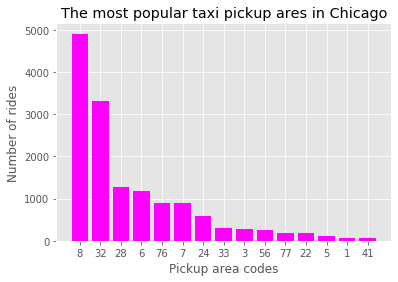

In [0]:
# creating a bar graph showing the number of rides with area codes
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['8','32','28','6','76','7','24','33','3','56','77','22','5','1','41']
y = [4907,3303,1284,1180,895,893,598,309,269,255,180,175,111,71,71]


x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='magenta')
plt.xlabel("Pickup area codes")
plt.ylabel("Number of rides")
plt.title("The most popular taxi pickup ares in Chicago")

plt.xticks(x_pos, x)

plt.show()

In [0]:
# creating a pie chart for the most popular taxi pickup ares in Chicago
# visualization shows Downtown Chicago is the most popular taxi pickup area
# proving the hypothesis: Chicago is centralized

mytitle = ({'text': "The most popular taxi pickup areas in Chicago",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})


#mytitle = "The most popular taxi pickup ares in Chicago"
mylabels= ['8','32','28','6','76','7','24','33','3','56','77','22','5','1','41']
myvalues = [4907,3303,1284,1180,895,893,598,309,269,255,180,175,111,71,71]
color1 = 'e11383'
color2 = 'f5821f'
color3 = '683817'

In [0]:
########### Set up the chart
import plotly.graph_objects as go
mydata = go.Pie(
    hole=0.5,
    sort=False,
    values=myvalues,
    labels=mylabels,
    marker={'colors': [color1, color2, color3],
            'line': {'color': 'white', 'width': 5}}
     )
mylayout = go.Layout(
    title = mytitle)
fig = go.Figure(data=[mydata], layout=mylayout)
fig.show()


##Hypothesis: Chicago residents use taxis more during rush hour


Conclusion by data visualization: Rejecting the hypothesis Chicago residents use taxis more during rush hour

**Conclusion** using ttest: Due to the p value of 0.99. I fail to reject the null hypothesis that there is a difference in taxi ride count between rush hour and other times in Chicago. **Ride count is same**.

In [0]:
#According to Chicago tribune and Tripadvisor rush hour is-
# Morning: 6am - 11 am
# Evening: 4pm - 8pm

In [5]:
condition = ((taxi['trip_start_hour']>= 6) & (taxi['trip_start_hour']<=11))
morn_df = taxi[condition]
morn_df.shape

(2872, 16)

In [6]:
condition1 = ((taxi['trip_start_hour']>= 16) & (taxi['trip_start_hour']<=20))
eve_df = taxi[condition1]
eve_df.shape

(4385, 16)

In [70]:
rush_hr = pd.concat([morn_df,eve_df])
print(rush_hr.shape)
rush_hr.head(2)

(7257, 16)


,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,payment_type,company,trip_seconds,dropoff_community_area,tips
11,33,9.85,6,11,6,1371812400,41.849247,-87.624135,NaN,NaN,2.81,Credit Card,NaN,840.0,NaN,3.0
30,32,7.85,11,11,2,1383562800,41.871016,-87.631407,41.849247,-87.624135,1.80,Cash,NaN,540.0,33.0,0.0


In [8]:
not_rush = taxi[~taxi['trip_start_hour'].isin ([6,7,8,9,10,11,16,17,18,19,20])]
print(not_rush.shape)
not_rush.head(2)

(7244, 16)


,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,payment_type,company,trip_seconds,dropoff_community_area,tips
15,32,6.85,4,13,6,1397222100,41.871016,-87.631407,NaN,NaN,2.10,Cash,Taxi Affiliation Services,240.0,NaN,0.0
20,7,5.85,2,0,7,1360972800,41.921778,-87.641460,NaN,NaN,1.26,Cash,NaN,300.0,NaN,0.0


In [9]:
ntride_rush = not_rush['pickup_community_area'].value_counts()
ntride_rush

8     2544
32    1393
6      734
28     579
7      485
76     431
24     376
56     132
3      119
33     115
22     114
77      84
5       69
1       37
41      32
Name: pickup_community_area, dtype: int64

In [10]:
ntride_rush = pd.DataFrame(not_rush['pickup_community_area'].value_counts().reset_index().values, columns=["area", "n_rides"])
ntride_rush= ntride_rush.sort_index(axis = 0, ascending=True)
print(ntride_rush.shape)
ntride_rush.head(2)

(15, 2)


,area,n_rides
0,8,2544
1,32,1393


In [11]:
ntride_rush.area.unique()

array([ 8, 32,  6, 28,  7, 76, 24, 56,  3, 33, 22, 77,  5,  1, 41])

In [12]:
rush_hr['pickup_community_area'].value_counts()

8     2363
32    1910
28     705
76     464
6      446
7      408
24     222
33     194
3      150
56     123
77      96
22      61
5       42
41      39
1       34
Name: pickup_community_area, dtype: int64

In [16]:
ride_rush = pd.DataFrame(rush_hr['pickup_community_area'].value_counts().reset_index().values, columns=["area", "nrsh_rides"])
ride_rush= ride_rush.sort_index(axis = 0, ascending=True)
print(ride_rush.shape)
ride_rush.head(2)

(15, 2)


,area,nrsh_rides
0,8,2363
1,32,1910


In [14]:
ride_rush.area.unique()

array([ 8, 32, 28, 76,  6,  7, 24, 33,  3, 56, 77, 22,  5, 41,  1])

In [177]:
ride_rush['n_rides'] = ntride_rush['n_rides']

ride_rush.head(2)

,area,nrsh_rides,n_rides
0,8,2363,2544
1,32,1910,1393


In [73]:
ride_rush['nrsh_rides'].sum()

7257

In [74]:
ride_rush['n_rides'].sum()

7244

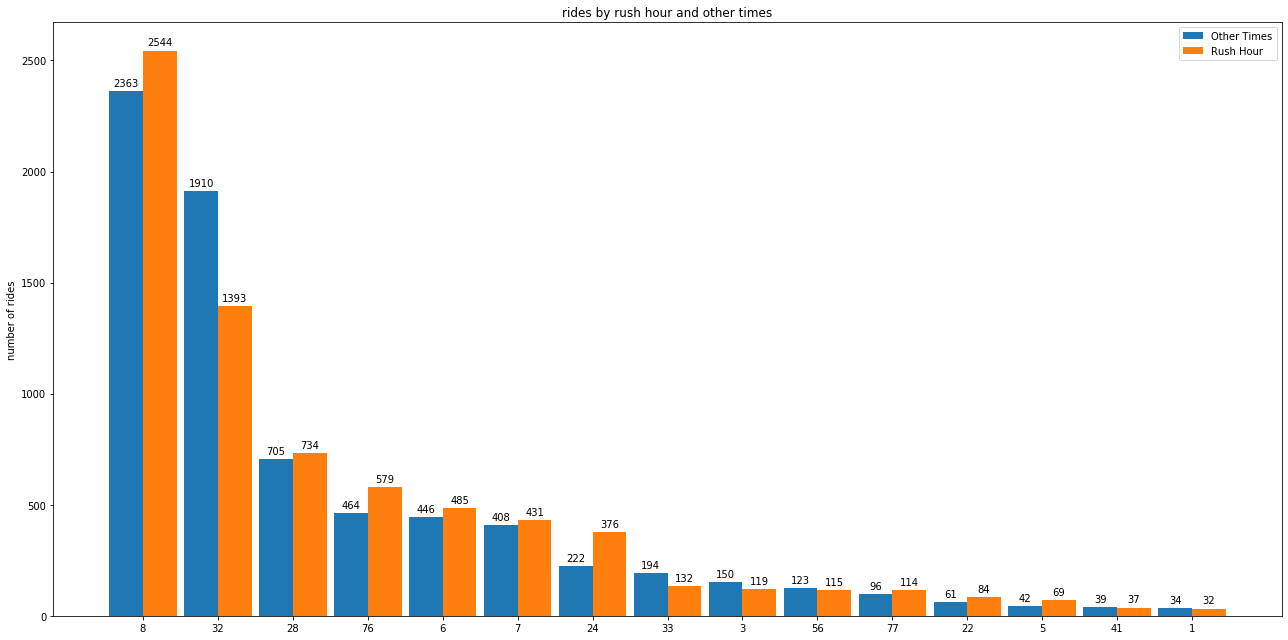

In [114]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

area =  ['8', '32', '28', '76',  '6',  '7', '24', '33', '3', '56', '77', '22',  '5', '41',  '1']
nt_rush = [2363, 1910,  705,  464,  446,  408,  222,  194,  150,  123,   96,
         61,   42,   39,   34]
rush = [2544, 1393,  734,  579,  485,  431,  376,  132,  119,  115,  114,
         84,   69,   37,   32]

x = np.arange(len(area))  # the label locations
width = 0.45  # the width of the bars
hieght = 0.65



fig, ax = plt.subplots(figsize=(18,9))
rects1 = ax.bar(x - width/2, nt_rush, width, label='Other Times')
rects2 = ax.bar(x + width/2, rush, width, label='Rush Hour')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of rides')
ax.set_title('rides by rush hour and other times')
ax.set_xticks(x)
ax.set_xticklabels(area)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()



In [86]:
#calculate mean
ride_rush['n_rides'].mean()

482.93333333333334

In [87]:
#calculate mean
ride_rush['nrsh_rides'].mean()

483.8

In [89]:
#imports
from scipy.stats import ttest_ind
#compare with a t test and omit the NaNs
ttest_ind(ride_rush['n_rides'],ride_rush['nrsh_rides'],nan_policy='omit')

Ttest_indResult(statistic=-0.0034356629162392107, pvalue=0.9972831046055182)

In [0]:
#Due to the p value of 0.99. I fail to reject the null hypothesis that there is a difference in taxi ride count between rush hour and other times in Chicago. Ride count is same.

In [180]:
# creating a table with stats for better visualization

import plotly.graph_objects as go
import plotly.figure_factory as ff

data_matrix = [['', 'Rush Hour', 'Other Times'],
               ['Total Ride Count', 82363, 82544],
               ['Mean', 482.93, 483.8],
               ['pvalue', 0.99728, 0.99728]]
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]


fig = ff.create_table(data_matrix,height_constant=30,colorscale=colorscale)
fig.update_layout(width=500)

fig.show()

#Taxi fare is higher during rush hour

**Conclusion**: Due to the p value of 0.008651076868516317.I reject the null hypothesis that there is no difference in fare between rush hour and other times.  **Fare is higher during rush hour**

In [188]:
rush_hr['fare'].sum()

87259.31

In [189]:
not_rush['fare'].sum()

83432.58

In [190]:
rush_hr['fare'].mean()

12.024157365302464

In [191]:
not_rush['fare'].mean()

11.51747377139703

In [193]:
#imports
from scipy.stats import ttest_ind
#compare with a t test and omit the NaNs
ttest_ind(rush_hr['fare'],not_rush['fare'],nan_policy='omit')

Ttest_indResult(statistic=2.6259008345331614, pvalue=0.008651076868516317)

In [0]:
#Due to the p value of 0.008651076868516317. I reject the null hypothesis.Fare is higher during rush hour

In [195]:
#visualization
# creating a table with stats for better visualization

import plotly.graph_objects as go
import plotly.figure_factory as ff

data_matrix = [['', 'Rush Hour', 'Other Times'],
               ['Total Fare Count', 87259.31, 83432.58],
               ['Mean', 12.02415, 11.51747],
               ['pvalue', 0.0086510, 0.0086510]]
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]


fig = ff.create_table(data_matrix,height_constant=30,colorscale=colorscale)
fig.update_layout(width=500)

fig.show()

In [204]:
import plotly.graph_objects as go
x=['rush hour', 'other']
y=[87259.31,83432.58]

fig = go.Figure(data=[go.Bar(
    x=x, y=y,
    text=y)])
fig.update_layout(width=500)
fig.show()

In [221]:
data_matrix = [['', 'Rush Hour', 'Other Times'],
               ['Total Fare Count', 87259.31, 83432.58],
               ['Mean', 12.02415, 11.51747],
               ['pvalue', 0.0086510, 0.0086510]]

colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]

fig = ff.create_table(data_matrix,height_constant=30,colorscale=colorscale)

x=['rush hour', 'other']
y=[87259.31,83432.58]

trace1 = go.Bar(x=x, y=y,
                marker=dict(color='#4d004c'),
                name='Fare Comparison Rush Hour Vs Other Times',
                xaxis='x2', yaxis='y2')
#add a trace
fig.add_trace(trace1)

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.yaxis.update({'domain': [0, .5]})
fig.layout.yaxis2.update({'domain': [.6, 1]})
                         
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'fare Count'})


 #Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':75, 'l':50})
fig.layout.update({'title': 'Fare Comparison Rush Hour Vs Other Times'})


# Update the height because adding a graph vertically will interact with
# the plot height calculated for the table
fig.layout.update({'height':600},{'width':500})



fig.show()

#Hypothesis: Taxi fare is higher in downtown Chicago area than other parts of Chicago

In [0]:
# Since I rejected the hypothesis fare increases during rush hour, now I will 
#like see if there is any difference in fare between downtown chicago area 
#and other parts of Chicago 
# Will use ttest to compare this feature




In [222]:
# creating dataframe for outside downtown area
taxi_notcentral = df[~df['pickup_community_area'].isin ([8,32,28,6,76,7,24,33,3,56,77,22,5,1,41])]
taxi_notcentral.head(2)

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,payment_type,company,trip_seconds,dropoff_community_area,tips


In [0]:
#Null hypothesis: There is a difference in fare betwwen downtown Chicago area and other parts of Chicago

In [0]:
#imports
from scipy.stats import ttest_ind

In [0]:
taxi['fare'].mean()

11.771042686711255

In [0]:
taxi_notcentral['fare'].mean()

11.70468937875751

In [0]:
#compare with a t test and omit the NaNs
ttest_ind(taxi['fare'],taxi_notcentral['fare'],nan_policy='omit')

Ttest_indResult(statistic=0.1262913247665108, pvalue=0.8995030159871049)

In [0]:
#Due to the p value of 0.899 I fail to reject the null hypothesis that there is a difference in fare between downtown Chicago area and other parts of Chicago. Fare is similar.



#If the distance to be traveled is more, then fare should be higher.
Conclusion:Trip fare have stronger correlations with trip distance and duration. The plot clearly shows that there are multiple linear correlations between trip distance and cost. But for the majority of trips, their **cost depends on the distances.**

In [115]:
import plotly.express as px
df = rush_hr
fig = px.scatter(df, x="fare", y="trip_miles", color="pickup_community_area",
                 size='trip_start_hour', hover_data=['fare'],width= 800, height=400)
fig.show()

In [153]:
#removing the outliers
condition = ((rush_hr['trip_miles'] < 150) & (rush_hr['fare'] < 150))
rush_new = rush_hr[condition]
rush_new.head(2)

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,payment_type,company,trip_seconds,dropoff_community_area,tips
11,33,9.85,6,11,6,1371812400,41.849247,-87.624135,NaN,NaN,2.81,Credit Card,NaN,840.0,NaN,3.0
30,32,7.85,11,11,2,1383562800,41.871016,-87.631407,41.849247,-87.624135,1.80,Cash,NaN,540.0,33.0,0.0


In [156]:
import plotly.express as px
df = rush_new
fig = px.scatter(df, x="trip_miles", y="fare", color="pickup_community_area",
                 size='trip_start_hour', hover_data=['fare'],width= 800, height=400)
fig.show()

In [0]:
#The plot clearly shows that there are multiple linear correlations between 
#trip distance and cost. But for the majority of trips, their cost depends on the
#distances.

#Correlation Matrix:
To better understand the relationship between distance travelled, time taken and cost will analyse the correlation matrix of them

In [132]:
#creating the dataframe
trip = rush_hr[['trip_seconds','trip_miles','fare']]
trip.head(2)

,trip_seconds,trip_miles,fare
11,840.0,2.81,9.85
30,540.0,1.80,7.85


In [133]:
#calculating the correlation matrix
trip.corr()

,trip_seconds,trip_miles,fare
trip_seconds,1.00000,0.513530,0.677490
trip_miles,0.51353,1.000000,0.487195
fare,0.67749,0.487195,1.000000


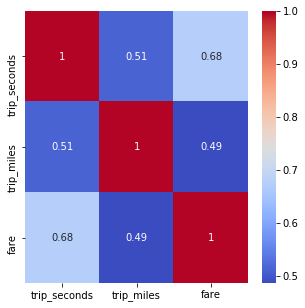

In [139]:
#plotting heatmap
plt.figure(figsize=(5,5))

sns.heatmap(trip.corr(),
            
            cmap='coolwarm',
            annot=True);

In [0]:
#The mileage and duration of a trip tend to correlate with each other.
#The longer one trip, then the longer time it takes to complete. 
#The trip milage correlates with trip duration which makes sense. 
#Trip fare have stronger correlations with trip distance and duration than those of total cost of trips. 
#This might due to other random factors adding to the total payment. 


In [0]:
#Trip duration does not seem to have a linear correlation with distance. 
#Some short trips takes long time to complete, while some long distance trips 
#take less time to finish. 
#This might due to the fact that the traffic condition is rather complicated in 
#the city and it is hard to predict trip duration based on trip distance only.